### Importações da lib Pandas e dos endpoints presentes na Api que serão necessários:

In [10]:
import pandas as pd

from nba_api.stats.static import players
from nba_api.stats.endpoints import playercareerstats
from nba_api.stats.endpoints import shotchartdetail

### Coletando o ID do jogador desejado:

In [11]:
info_kyrie = players.find_players_by_full_name('Kyrie Irving')

print(info_kyrie)

[{'id': 202681, 'full_name': 'Kyrie Irving', 'first_name': 'Kyrie', 'last_name': 'Irving', 'is_active': True}]


### Visualizando o Dataframe referente a toda a carreira do jogador, com intuito de coletar o ID da temporada que iremos usar e o ID do seu time:

In [12]:
df_carreira = playercareerstats.PlayerCareerStats(player_id='202681') 

df_carreira.get_data_frames()[0].tail()

,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
10,202681,2021-22,00,1610612751,BKN,30.0,29,29,1092.0,289,...,0.915,16,111,127,167,41,17,73,81,796
11,202681,2022-23,00,1610612751,BKN,31.0,40,40,1478.0,398,...,0.883,38,166,204,211,41,33,91,109,1084
12,202681,2022-23,00,1610612742,DAL,31.0,20,20,763.0,196,...,0.947,21,79,100,120,25,12,37,56,539
13,202681,2022-23,00,0,TOT,31.0,60,60,2241.0,594,...,0.905,59,245,304,331,66,45,128,165,1623
14,202681,2023-24,00,1610612742,DAL,32.0,58,58,2030.0,562,...,0.905,44,246,290,299,74,28,106,112,1487


### Coletando Dataframe de arremessos utilizando as informações encontradas acima(ID do jogador, da temporada e do time)

In [13]:
kyrie_shotchart_temporada = shotchartdetail.ShotChartDetail(player_id=202681, team_id=1610612742, 
                                    season_type_all_star='Regular Season', season_nullable='2023-24', context_measure_simple='FGA').get_data_frames()[0]

In [14]:
display(kyrie_shotchart_temporada.head(3)) # visualizando o Dataframe encontrado
display(kyrie_shotchart_temporada.info())

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,...,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
0,Shot Chart Detail,0022300006,22,202681,Kyrie Irving,1610612742,Dallas Mavericks,1,9,47,...,Center(C),Less Than 8 ft.,6,25,63,1,1,20231103,DEN,DAL
1,Shot Chart Detail,0022300006,49,202681,Kyrie Irving,1610612742,Dallas Mavericks,1,6,58,...,Center(C),24+ ft.,27,76,261,1,0,20231103,DEN,DAL
2,Shot Chart Detail,0022300006,287,202681,Kyrie Irving,1610612742,Dallas Mavericks,2,4,33,...,Center(C),Less Than 8 ft.,2,0,22,1,1,20231103,DEN,DAL


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1131 entries, 0 to 1130
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   GRID_TYPE            1131 non-null   object
 1   GAME_ID              1131 non-null   object
 2   GAME_EVENT_ID        1131 non-null   int64 
 3   PLAYER_ID            1131 non-null   int64 
 4   PLAYER_NAME          1131 non-null   object
 5   TEAM_ID              1131 non-null   int64 
 6   TEAM_NAME            1131 non-null   object
 7   PERIOD               1131 non-null   int64 
 8   MINUTES_REMAINING    1131 non-null   int64 
 9   SECONDS_REMAINING    1131 non-null   int64 
 10  EVENT_TYPE           1131 non-null   object
 11  ACTION_TYPE          1131 non-null   object
 12  SHOT_TYPE            1131 non-null   object
 13  SHOT_ZONE_BASIC      1131 non-null   object
 14  SHOT_ZONE_AREA       1131 non-null   object
 15  SHOT_ZONE_RANGE      1131 non-null   object
 16  SHOT_D

None

## Gerando a visualização dos arremessos:

### A imagem da quadra foi reutilizada de um repositório público do GitHub que contém MIT License.
##### [Link do repositório](https://github.com/bradleyfay/py-Goldsberry/blob/master/docs/Visualizing%20NBA%20Shots%20with%20py-Goldsberry.ipynb)

In [15]:
from desenhar_quadra import draw_court # coloquei a função em outro arquivo para não ocupar muito espaço.

In [16]:
print('Limites do Eixo Y. Max:', kyrie_shotchart_temporada.LOC_Y.max(), ', Min:', kyrie_shotchart_temporada.LOC_Y.min())
# esse limites foram utilizados para delimitar o tamanho da quadra e para deixar a imagem na rotação idêntica encontrada no site da NBA.

Limites do Eixo Y. Max: 445 , Min: -36


### Filtrando os arremessos:

In [17]:
arremessos_certos = kyrie_shotchart_temporada.query('SHOT_MADE_FLAG == 1')
arremessos_errados = kyrie_shotchart_temporada.query('SHOT_MADE_FLAG == 0')

#### A visualização foi feita utilizando um gráfico de dispersão que foi posto em cima do desenho da quadra. 

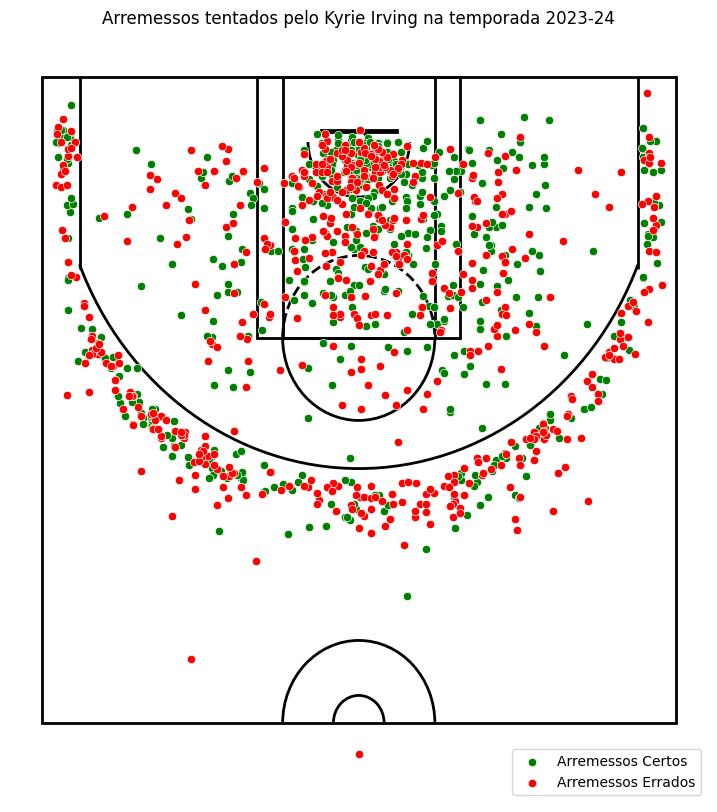

In [18]:
import matplotlib.pyplot as plt # importando as libs necessárias para gerar o gráfico.
import seaborn as sns

plt.figure(figsize=(9, 10))
plt.ylim(480, -80)

draw_court(outer_lines=True, color="black")

sns.scatterplot(x=arremessos_certos.LOC_X, y=arremessos_certos.LOC_Y, 
                data=kyrie_shotchart_temporada, 
                color='green', label='Arremessos Certos')

sns.scatterplot(x=arremessos_errados.LOC_X, y=arremessos_errados.LOC_Y, 
                data=kyrie_shotchart_temporada, 
                color='red', label='Arremessos Errados')

plt.title('Arremessos tentados pelo Kyrie Irving na temporada 2023-24')
plt.legend(loc='lower right')
plt.axis('off')
plt.show()